#### **Import modules**

In [31]:
from typing import List

import pandas as pd
import seaborn as sns
from gensim.models import Word2Vec
from matplotlib import pyplot as plt
from nltk.tokenize import sent_tokenize
from sklearn.decomposition import PCA

from utils import GeorgianWord2VecModel, GeorgianFastTextModel

#### **Init word2vec model**

In [32]:
texts = [["გამარჯობა", "როგორ", "ხარ?"], ["რავი", "კარგად", "შენ?"]]

model = Word2Vec(sentences=texts, vector_size=100, window=5, min_count=1, workers=4, epochs=6)

model.save("word2vec.model")

## **Convert file into input format**

word2vec model gets list of list of strings as an input

In [33]:
def convert_file_into_input(file_path: str) -> List[List[str]]:
    with open(file_path, 'r') as f:
        data = f.read()

    sentences = sent_tokenize(data)
    print(sentences)
    return [[word.strip() for word in sentence.split(" ")] for sentence in sentences]

In [7]:
data = convert_file_into_input("../data/data2.txt")

['ედუარდ შევარდნაძე \nედუარდ ამბროსის ძე შევარდნაძე (დ.', '25 იანვარი, 1928, სოფელი მამათი, ოზურგეთის მაზრა, საქართველოს სსრ — გ.', '7 ივლისი, 2014, თბილისი, საქართველო) — ქართველი პოლიტიკოსი და სახელმწიფო მოღვაწე.', '1972-1985 წლებში საქართველოს სსრ-ის კომპარტიის ცკ-ს პირველი მდივანი, 1985-1990 წლებში საბჭოთა კავშირის საგარეო საქმეთა მინისტრი, 1995–2003 წლებში საქართველოს პრეზიდენტი.', 'იყო სსრკ-ის IX-XI მოწვევების უმაღლესი საბჭოს დეპუტატი.', 'სოციალისტური შრომის გმირი (1981), სკკპ ცკ-ის პოლიტბიუროს წევრობის კანდიდატი (1978), წევრი 1985 წლის ივლისიდან.', '1964–1965 წლებში იყო საზოგადოებრივი წესრიგის დაცვის მინისტრის მოადგილე.', '1965–1972 წლებში საქართველოს სსრ შინაგან საქმეთა მინისტრი.', '1985 წელს შევარდნაძე სსრკ-ის საგარეო საქმეთა მინისტრად დაინიშნა.', '1990 წელს იგი გადადგა.', '1991 წელს მიხეილ გორბაჩოვის მიწვევით კვლავ დაუბრუნდა მინისტრის პოსტს.', '1992 წელს საქართველოს სახელმწიფო საბჭოს ხელმძღვანელი, 1992–1995 წლებში საქართველოს რესპუბლიკის პარლამენტის თავმჯდომარე.', 'მონაწილეობ

### Create and test GeorgianWord2VecModel

In [34]:
word2vec_model = GeorgianWord2VecModel(load=True)

Initializing data
Model created!


In [39]:
word2vec_model.train("../data/data_210000.txt")

In [40]:
word2vec_model.get_vector("ედუარდ")

array([ 0.1003886 , -0.18132104,  0.6019979 , -1.1706294 ,  0.4231788 ,
       -0.11792678,  1.3256718 ,  0.95318115, -1.5817567 ,  0.3033582 ,
       -2.0699856 , -1.6936392 ,  0.49443722,  0.25756848,  1.3290517 ,
        0.3392464 , -1.0679038 , -1.155281  , -0.41371143,  1.0277483 ,
       -0.76986325,  0.42246932,  0.01878421, -0.35504946,  1.1416945 ,
        0.33996725, -0.36684486,  0.25191268, -1.0976964 , -1.6202228 ,
       -0.74245125, -0.6264916 ,  1.0141919 , -0.8477866 , -0.9111297 ,
        0.06549943, -0.52644575,  0.3238619 ,  0.19691467, -0.5891334 ,
       -0.32717386,  1.5309631 , -1.3797427 ,  0.07039199, -2.0981295 ,
       -0.6025085 , -0.9917238 ,  0.88967997,  0.01138998,  0.72817415,
       -0.16308686, -1.2327101 , -0.5944057 , -0.46388894,  0.3074503 ,
        0.23757958,  0.35340217,  0.4005791 ,  1.4931003 ,  1.3056996 ,
        0.694904  ,  0.5449644 , -1.0360109 , -0.13578333, -0.62729573,
        1.3749013 , -0.09802196, -0.8924769 , -0.7716305 ,  0.62

In [43]:
model = word2vec_model.get_model()

In [44]:

def get_df_from_model(model: Word2Vec, export_words: List[str]) -> pd.DataFrame:
    vectors = model.wv.vectors
    words = model.wv.index_to_key
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(vectors)

    words = pd.DataFrame(words)
    pca_result = pd.DataFrame(pca_result)
    pca_result['x_values'] = pca_result.iloc[0:, 0]
    pca_result['y_values'] = pca_result.iloc[0:, 1]
    pca_final = pd.merge(words, pca_result, left_index=True, right_index=True)
    pca_final['word'] = pca_final.iloc[0:, 0]
    result = pca_final[['word', 'x_values', 'y_values']]

    result = result.sample(frac=1)
    result = result.loc[
        result['word'].isin(export_words)]
    return result.head(9)


### სინონიმების ჯგუფების კლასტერიზაცია

___



In [48]:

export_words_list = ["ბევრი", "მრავალი", "მამა", "დედა", "შოკოლადი", "სანუკვარი", "ნანატრი", "ტკბილეული"]
pca_data = get_df_from_model(model, export_words_list)

pca_data

,word,x_values,y_values
3738,მრავალი,5.632991,1.428901
175,დედა,4.861283,-3.850070
73278,ტკბილეული,-0.214496,0.134016
197263,ნანატრი,-0.268049,-0.147157
49608,სანუკვარი,-0.000562,-0.234360
4539,ბევრი,5.039426,1.905624
166,მამა,4.917769,-5.173430
115088,შოკოლადი,-0.104616,0.062382


In [46]:
def get_graph(pca_data: pd.DataFrame) -> None:
    fig = sns.lmplot(x='x_values', y='y_values',
                     data=pca_data,
                     fit_reg=False,
                     legend=True,
                     hue='word')

    fig = plt.gcf()
    fig.set_size_inches(8, 6)
    plt.show()

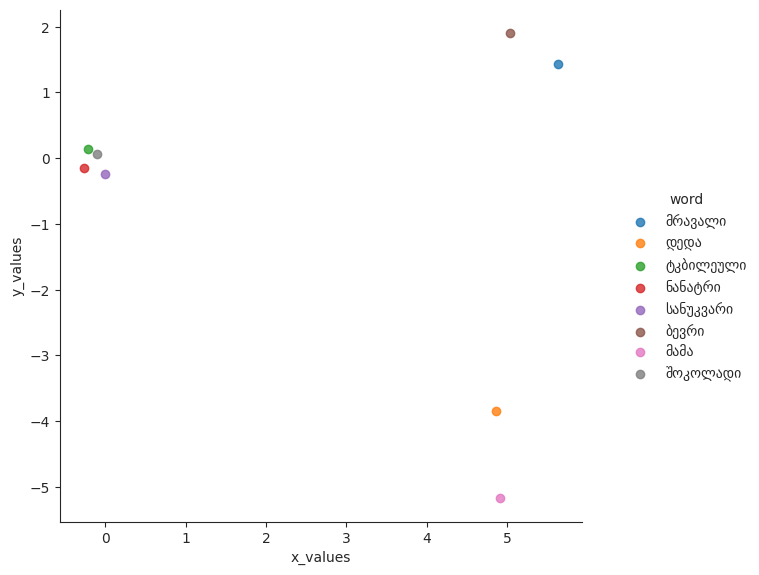

In [49]:
get_graph(pca_data)

### პატარა მონაცემებზე

Initializing data
Model created!


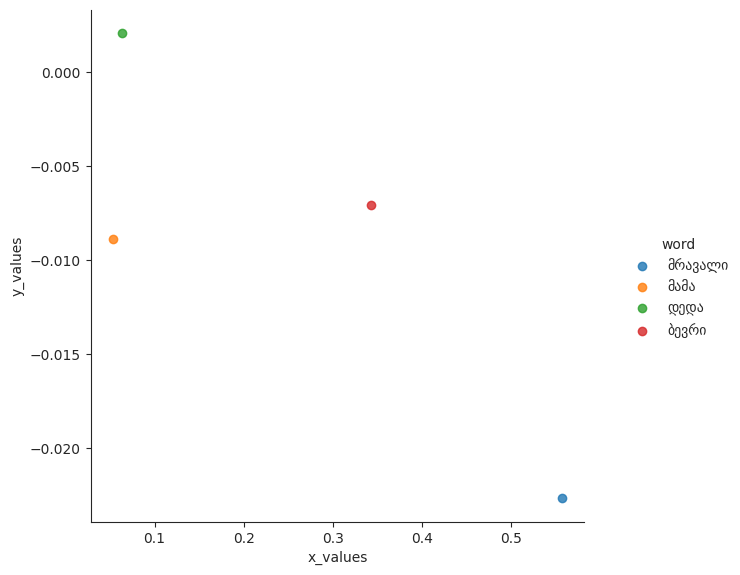

In [47]:
word2vec_small_data_model = GeorgianWord2VecModel()
word2vec_small_data_model.train("../data/data3.txt")

export_words_list = ["ბევრი", "მრავალი", "მამა", "დედა", "შოკოლადი", "სანუკვარი", "ნანატრი", "ტკბილეული"]

pca_data = get_df_from_model(word2vec_small_data_model.get_model(), export_words_list)

get_graph(pca_data)

### არსებითი სახელის ბრუნვა

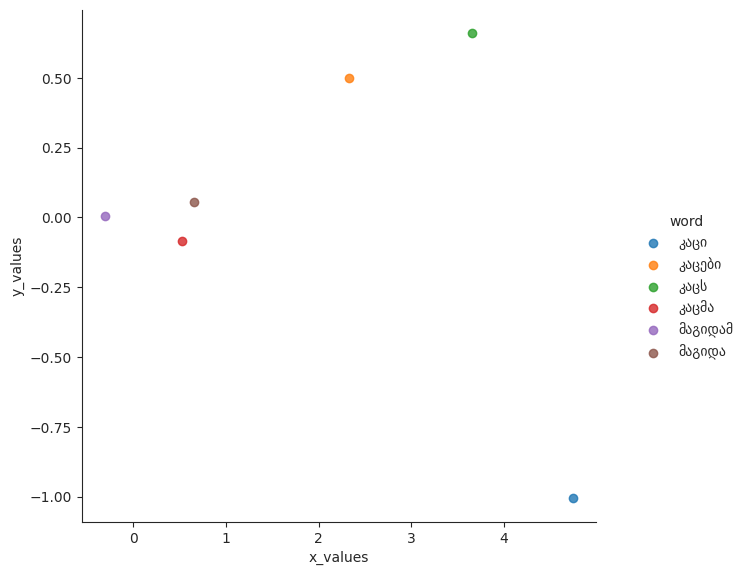

In [50]:
export_words_list = ["კაცი", "კაცმა", "კაცს", "კაცები", "მაგიდა", "მაგიდამ"]

pca_data = get_df_from_model(model, export_words_list)

get_graph(pca_data)

### ანტონიმთა ჯგუფების კლასტერიზაცია

---

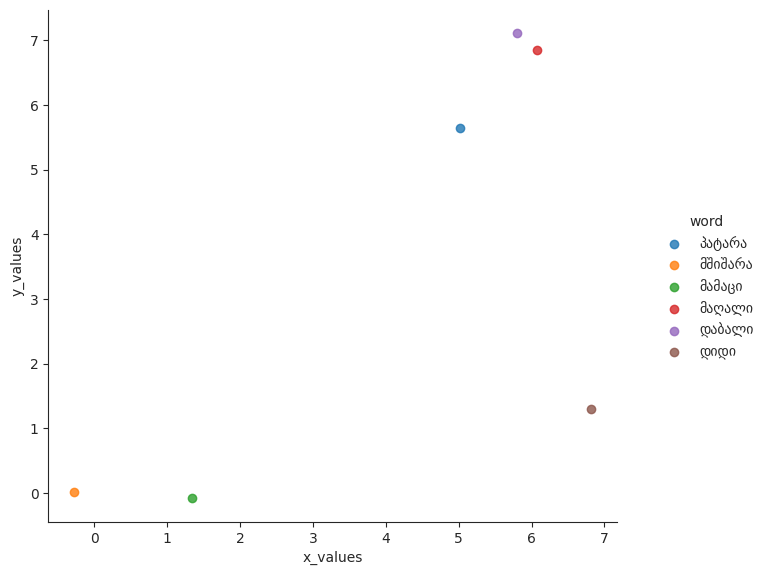

In [51]:
export_words_list = ["მაღალი", "დაბალი", "მამაცი", "მშიშარა", "დიდი", "პატარა"]

pca_data = get_df_from_model(model, export_words_list)

get_graph(pca_data)

### საკუთარი სახელების კლასტერიზაცია

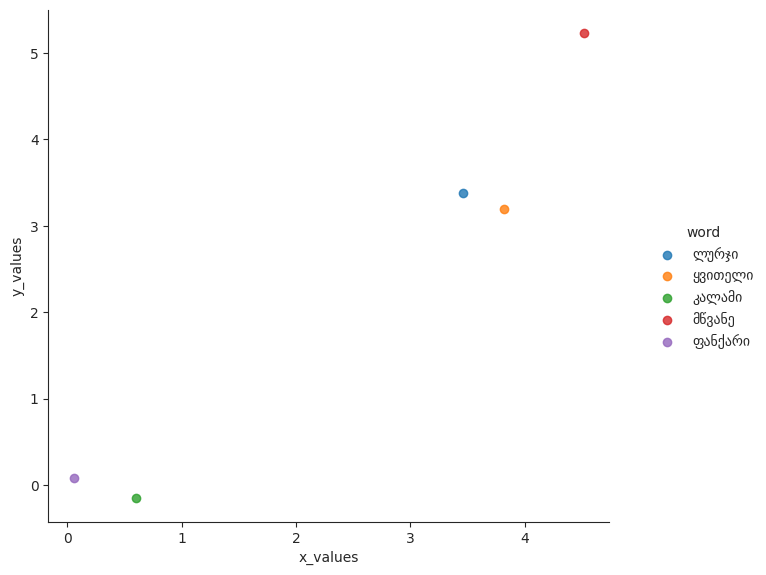

In [52]:
export_words_list = ["ლურჯი", "მწვანე", "ყვითელი", "ფანქარი", "კალამი"]

pca_data = get_df_from_model(model, export_words_list)

get_graph(pca_data)

In [28]:
fasttext_model = GeorgianFastTextModel(load=True)
# fasttext_model.train("../data/data_115000.txt")

Initializing data
Model created!


In [29]:
export_words_list = ["კაცი", "კაცმა", "კაცს", "მდინარე", "მდინარენი"]

pca_data = get_df_from_model(fasttext_model.get_model(), export_words_list)

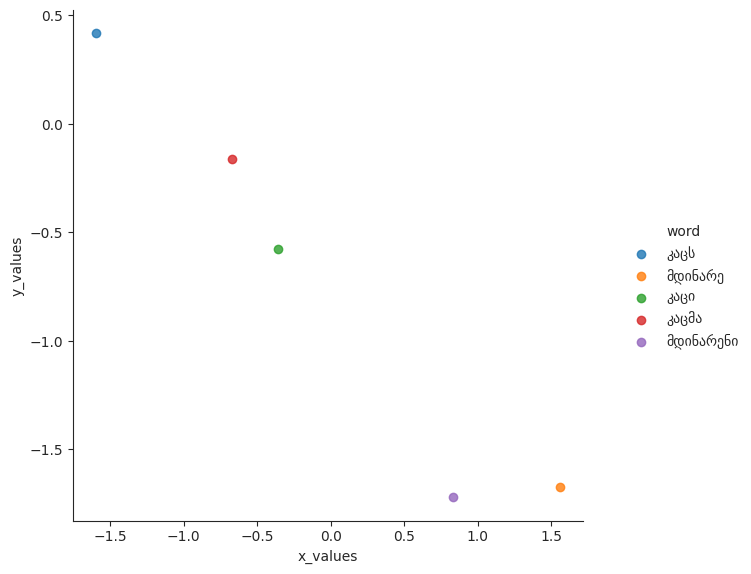

In [30]:
get_graph(pca_data)